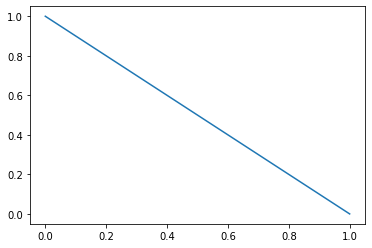

INFO:root:test
INFO:root:test


(-75, -56)
Import of general_pyNN.PYNNBackend failed due to:
No module named 'pyNN'


In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
import hide_imports

import sys
import traceback


In [3]:

def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM


def permutations(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]
    ga_out0 = use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True}, MU=2,NGEN=1)
    ga_out1 =  use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=1,seed_pop=ga_out0['pf'][0])

    
    dtc = ga_out1['pf'][0].dtc
    vm,plt = inject_and_plot_model(dtc.attrs,dtc.backend)

    return dtc, ga_out1['DO'], vm


In [4]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
OMObjects = []
backends = ["RAW","HH"]#"ADEXP","BHH"]
tt = test_frame['Neocortex pyramidal cell layer 5-6']
tt = tt.tests


# Round trip testing below

In [5]:

#for t in test_frame.values():
#    break
    
for b in backends:        
    OM = jrt(hide_imports.copy.copy(tt),b)
    OMObjects.append(OM)
rt_outs = []
from neuronunit.optimisation.optimization_management import inject_and_plot_model


RAW
Random simulated data tests made
[<neuronunit.optimisation.data_transport_container.DataTC object at 0x7fbc23068b38>, <neuronunit.optimisation.data_transport_container.DataTC object at 0x7fbc23068b38>]
{'value': array(107.53927231) * pA, 'mean': array(107.53927231) * pA, 'std': array(107.53927231) * pA}
ranges OrderedDict([('C', (50, 200)), ('k', (0.7, 1.6)), ('vr', (-75, -56)), ('vt', (-50, -40)), ('vPeak', (25, 50)), ('a', (0.01, 0.03)), ('b', (-2, 15)), ('c', (-60, -40)), ('d', (10, 150)), ('dt', [0.005, 0.005])]) maybe ranges are wrong
[('RheobaseTest', array(107.53927231) * pA), ('InputResistanceTest', array(43514484.79891928) * kg*m**2/(s**3*A**2)), ('TimeConstantTest', array(0.00438956) * s), ('CapacitanceTest', array(1.0087581e-10) * s**4*A**2/(kg*m**2)), ('RestingPotentialTest', array(3.55271368e-14) * mV), ('InjectedCurrentAPWidthTest', array(8.3e-05) * s), ('InjectedCurrentAPAmplitudeTest', array([57.36426236]) * mV), ('InjectedCurrentAPThresholdTest', array(-2.1591071) 

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,107.53927230834961 pA,43514484.798919275 kg*m**2/(s**3*A**2),0.004389558902153532 s,1.0087581003056138e-10 s**4*A**2/(kg*m**2),-61.82135391187814 mV,0.0008300000000000001 s,[57.36426235571374 mV],-21.591071032007697 mV,NaN
predictions,181.1944305896759 pA,43649910.381063245 kg*m**2/(s**3*A**2),0.002422809626400518 s,5.550548913501578e-11 s**4*A**2/(kg*m**2),-75.0 mV,0.00026000000000000003 s,58.74186479899206 mV,-9.789739083241424 mV,NaN
scores,0.684914,1.00311,0.551948,0.550236,1.21317,0.313253,1.02401,0.453416,5.794068


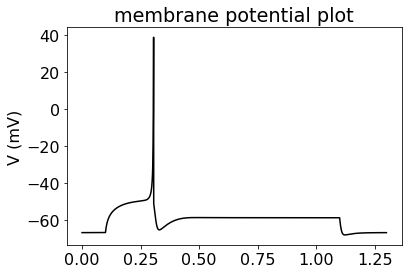

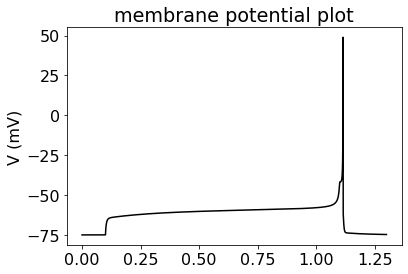

In [8]:
OM = OMObjects[0]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)
#OM.tests ={k:v.score_type 
#from sciunit import scores
#for k,v in OM.tests.items():
#    OM.tests[k].score_type = scores.RatioScore
rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 10, MU = 10)
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)
found.obs_preds



In [6]:
origin_target.obs_preds

AttributeError: 'DataTC' object has no attribute 'obs_preds'

In [ ]:
OM = OMObjects[1]
print(OM.backend)
x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
OM.tests = hide_imports.TSD(OM.tests)
rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 4, MU = 4)
rt_outs.append(rt_out)     
origin_target = rt_outs[-1][2][0]
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[-1][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)


In [ ]:
origin_target = rt_outs[0][2][0]
from neuronunit.optimisation.optimization_management import inject_and_plot_model
inject_and_plot_model(origin_target.attrs,origin_target.backend)
found = rt_outs[0][0]['pf'][0].dtc
inject_and_plot_model(found.attrs,found.backend)

In [ ]:
display(rt_outs[0][0]['pf'][0].dtc.backend)
display(rt_outs[0][0]['pf'][0].dtc.SA)


In [ ]:
display(rt_outs[1][0]['pf'][0].dtc.backend)
display(rt_outs[1][0]['pf'][0].dtc.SA)


In [ ]:

display(rt_outs[2][0]['pf'][0].dtc.backend)
display(rt_outs[2][0]['pf'][0].dtc.SM)


In [ ]:
try:
    display(rt_outs[3][0]['pf'][0].dtc.backend)
    display(rt_outs[3][0]['pf'][0].dtc.SM)
except:
    pass

In [ ]:

backends = ["RAW","HH","ADEXP","BHH"]


for t in test_frame.values():
    for b in backends:
        
        (dtc,DO,vm) = permutations(copy.copy(t),b)
        print(b)
        display(dtc.SM)
        display(dtc.obs_preds)
        plt.plot(vm.times,vm.magnitude)
        plt.show()




In [ ]:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"ADEXP")
display(dtc.SM)
display(dtc.obs_preds)

In [ ]:

backends = ["RAW","HH","BHH"]  



#for b in backends:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"RAW")


In [ ]:
backends = iter(["RAW","HH","BHH"])


from IPython.display import HTML, display

for b in backends:
    (dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],b)
    display(dtc.SM)
    display(dtc.obs_preds)



In [ ]:
#test_frame['Neocortex pyramidal cell layer 5-6']

##### 